# K-Means con Python: Paso a paso

El algoritmo trabaja iterativamente para asignar a cada `punto` (las filas de nuestro conjunto de entrada forman una coordenada) uno de los `K` grupos basado en sus características. Son agrupados en base a la similitud de sus features (las columnas). Como resultado de ejecutar el algoritmo tendremos:

* Los `centroides` de cada grupo que serán unas `coordenadas` de cada uno de los K conjuntos que se utilizarán para poder etiquetar nuevas muestras.
* Etiquetas para el conjunto de datos de entrenamiento. Cada etiqueta perteneciente a uno de los K grupos formados.

Los grupos se van definiendo de manera orgánica, es decir que `se va ajustando su posición en cada iteración del proceso`, hasta que converge el algoritmo. Una vez hallados los centroides deberemos analizarlos para ver cuales son sus características únicas, frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo.

# Datos de Entrada para K-Means

Las features o características que utilizaremos como entradas para aplicar el algoritmo k-means deberán ser de valores numéricos, continuos en lo posible. En caso de valores categóricos (por ej. Hombre/Mujer o Ciencia Ficción, Terror, Novela, etc) se puede intentar pasarlo a valor numérico, pero no es recomendable pues no hay una `distancia real` -como en el caso de géneros de película o libros-. Además es recomendable que los valores utilizados estén normalizados, manteniendo una misma escala. En algunos casos también funcionan mejor datos porcentuales en vez de absolutos. No conviene utilizar features que estén correlacionados o que sean escalares de otros.

# El Algoritmo K-means

El algoritmo utiliza una proceso iterativo en el que se van ajustando los grupos para producir el resultado final. Para ejecutar el algoritmo deberemos pasar como entrada el conjunto de datos y un valor de K. El conjunto de datos serán las características o features para cada punto. Las posiciones iniciales de los K centroides serán asignadas de manera aleatoria de cualquier punto del conjunto de datos de entrada. Luego se itera en dos pasos:

## 1. Paso de Asignación de datos

En este paso, cada fila de nuestro conjunto de datos se asigna al centroide más cercano basado en la distancia cuadrada Euclideana. Se utiliza la siguiente fórmula (donde $dist()$ es la distancia Euclideana estándar):

$$\arg\max_{c_i \in C} dist(c_i,x)^2$$

## 2. Paso de actualización de Centroid

En este paso los centroides de cada grupo son recalculados. Esto se hace tomando una media de todos los puntos asignados en el paso anterior.

$$c_i = \frac{1}{\left | S_i \right |} \sum_{x_i \in S_i} x_i$$

## 3. El algoritmo itera entre estos pasos hasta cumplir un criterio de detención:
*  Si no hay cambios en los centroides asignados a los grupos,
* o si la suma de las distancias se minimiza,
* o se alcanza un número máximo de iteraciones.

`El algoritmo converge a un resultado que puede ser un óptimo local, por lo que será conveniente volver a ejecutar más de una vez con puntos iniciales aleatorios para confirmar si hay una salida mejor.`

---
# Agrupar usuarios Twitter de acuerdo a su personalidad con K-means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Cargamos los datos de entrada del archivo csv

In [2]:
dataframe = pd.read_csv("analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [3]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


El archivo contiene diferenciadas 9 categorías (actividades laborales) que son:

1. `Actor/actriz`
2. `Cantante`
3. `Modelo`
4. `TV, series`
5. `Radio`
6. `Tecnología`
7. `Deportes`
8. `Politica`
9. `Escritor`

In [4]:
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


Como vemos tenemos 34 cantantes, 27 actores, 17 deportistas, 16 políticos, etc.

## Visualización de Datos

Veremos graficamente nuestros datos para tener una idea de la dispersión de los mismos:

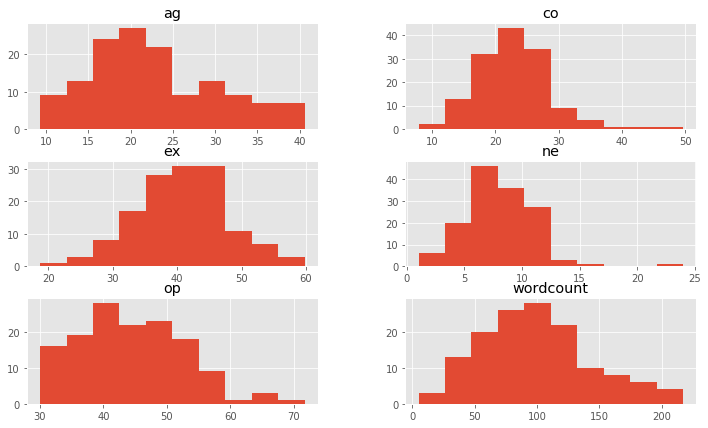

In [5]:
dataframe.drop(['categoria'],1).hist(figsize=(12,7))
plt.show()

En este caso seleccionamos 3 features: `op`, `ex` y `ag` (`Openess`, `Extraversion` y `Agreeablenes`) y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con sus categorías.

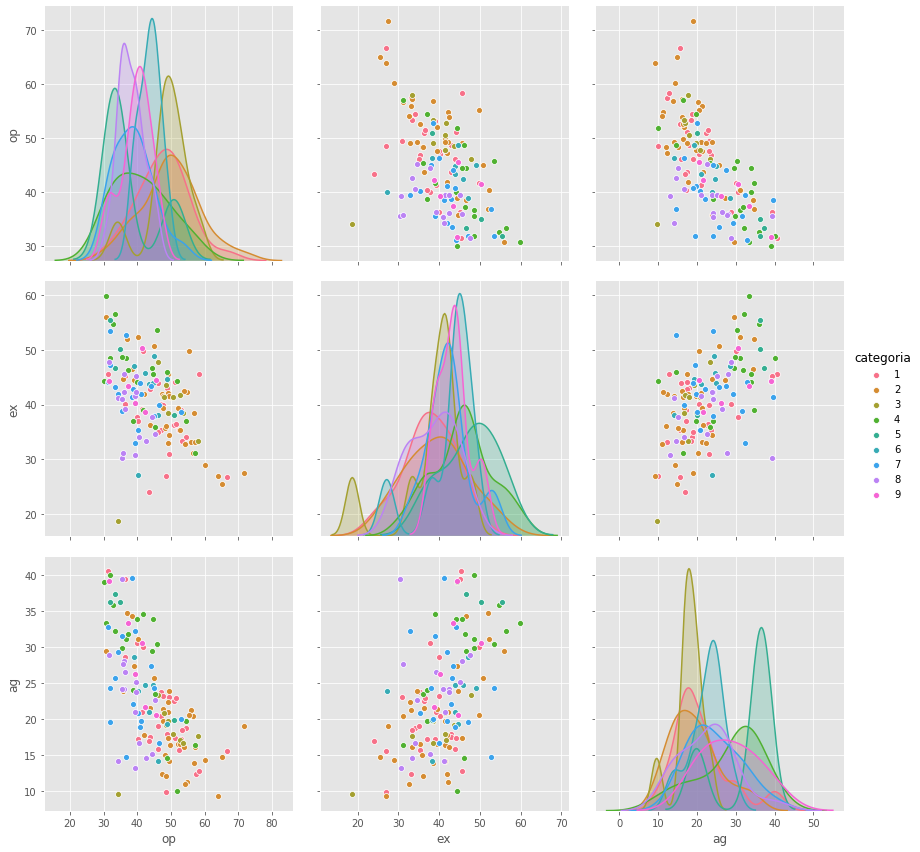

In [6]:
sb.pairplot(dataframe.dropna(), hue='categoria', height=4, vars=["op","ex","ag"], kind='scatter');

Revisando la gráfica no pareciera que haya algún tipo de agrupación o correlación entre los usuarios y sus categorías.

## Definimos la entrada
Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. Como se ve, sólo cargamos las columnas `op`, `ex` y `ag` en nuestra variable `X.`

In [6]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

Ahora veremos una gráfica en 3D con 9 colores representando las categorías.

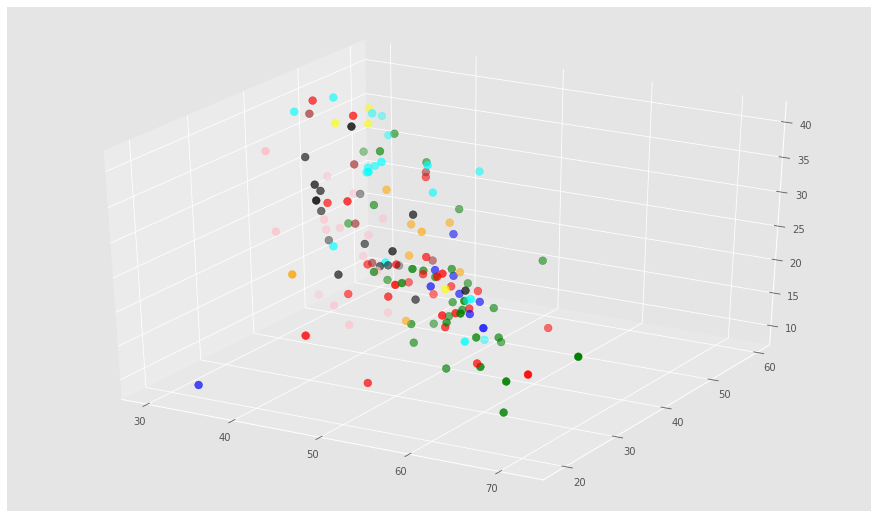

In [7]:
fig = plt.figure(figsize=(12,7))
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60);

Veremos si con K-means, podemos `pintar` esta misma gráfica de otra manera, con clusters diferenciados.

## Obtener el valor K

Vamos a hallar el valor de K haciendo una gráfica e intentando hallar el `punto de codo` (más adelante veremos que significa esto, por ahora sólo decimos que ese punto es donde se produce un cambio en la curva). 

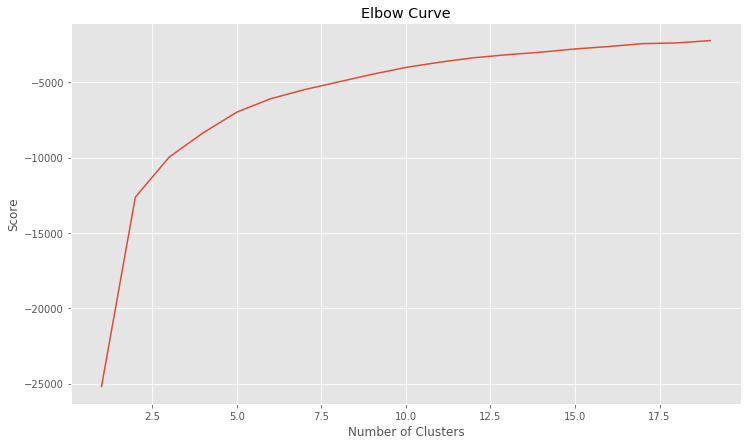

In [8]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.figure(figsize=(12,7))
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Consideremos a 5 como un buen número para K.

## Ejecutamos K-Means
Ejecutamos el algoritmo para 5 clusters y obtenemos las etiquetas y los centroids.

In [9]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[43.42489342 32.20419121 19.27634421]
 [40.22889929 42.87666588 23.44923068]
 [50.73809617 40.40047483 17.42637107]
 [35.90241306 47.56828232 33.58748762]
 [60.35359892 30.299381   15.71781133]]


Ahora veremos esto en una gráfica 3D con colores para los grupos y veremos si se diferencian: (las estrellas marcan el centro de cada cluster)

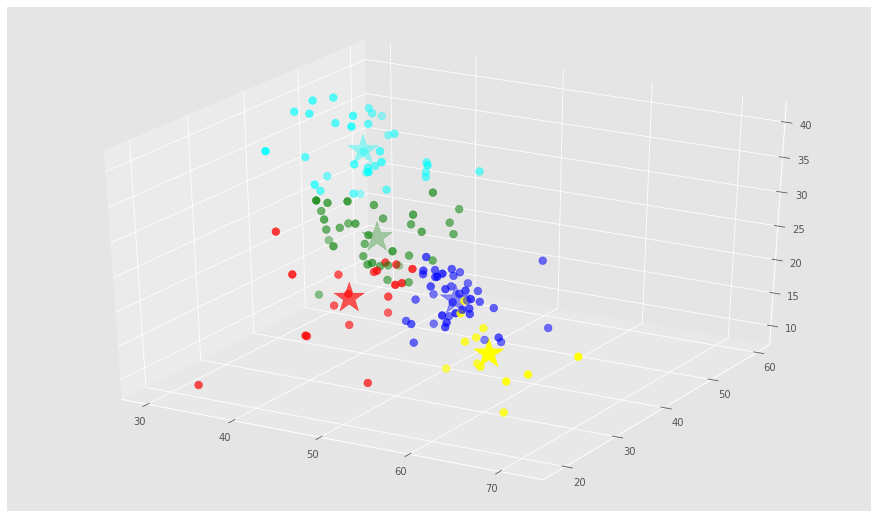

In [10]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure(figsize=(12,7))
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000);

Aqui podemos ver que el Algoritmo de K-Means con $K=5$ ha agrupado a los 140 usuarios Twitter por su personalidad, teniendo en cuenta las 3 dimensiones que utilizamos: `Openess`, `Extraversion` y `Agreeablenes`. 

Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

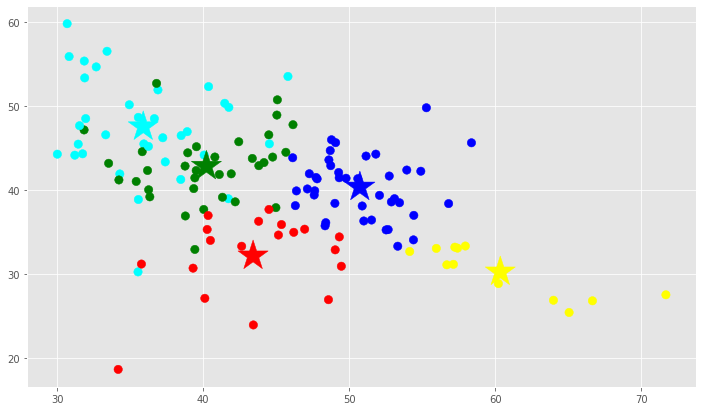

In [11]:
f1 = dataframe['op'].values
f2 = dataframe['ex'].values
 
fig = plt.figure(figsize=(12,7))
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

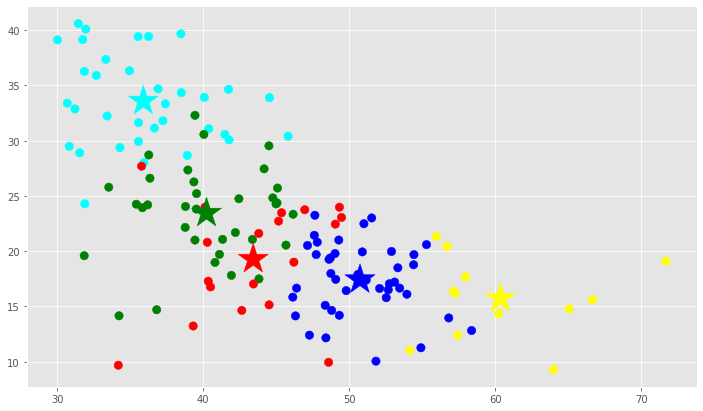

In [12]:
f1 = dataframe['op'].values
f2 = dataframe['ag'].values
 
fig = plt.figure(figsize=(12,7))
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

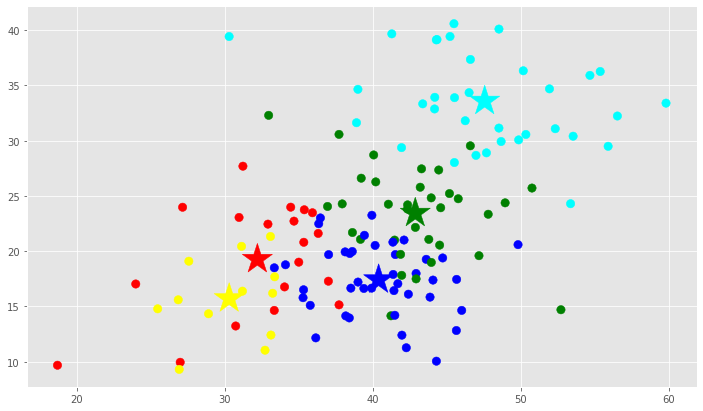

In [13]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values

'''
# Este codigo comentado agrega las categorias sobre cada punto
for label, x, y in zip(dataframe['categoria'].values, f1, f2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
'''
fig = plt.figure(figsize=(12,7))
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

En estas gráficas vemos que están bastante bien diferenciados los grupos.

Podemos ver cuantos usuarios tiene cada uno de los clusters:

In [14]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,19
1,green,34
2,blue,41
3,cyan,34
4,yellow,12


Y podemos ver la diversidad en rubros laborales de cada uno. Por ejemplo en el `Grupo 0.`

In [15]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 0
group_referrer_index = copy['label'] == 0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,6.0
2,2,3.0
3,3,1.0
4,4,1.0
5,5,NaN
6,6,1.0
7,7,1.0
8,8,6.0
9,9,NaN


Buscaremos los usuarios que están más cerca a los centroides de cada grupo, que podríamos decir que tienen los rasgos de personalidad característicos que representan a cada cluster:

In [16]:
#vemos el representante del grupo, el usuario mas cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X) #posicion en el array de usuarios
closest

array([123,  64,  21,  98,  53])

In [17]:
users=dataframe['usuario'].values
for row in closest:
    print(str(users[row])+" ===> Categoría: "+str(dataframe['categoria'].iloc[row]))

SJP ===> Categoría: 1
ierrejon ===> Categoría: 8
carmenelectra ===> Categoría: 3
maria_patino ===> Categoría: 4
foofighters ===> Categoría: 2


1. `Actor/actriz`
2. `Cantante`
3. `Modelo`
4. `TV, series`
5. `Radio`
6. `Tecnología`
7. `Deportes`
8. `Politica`
9. `Escritor`

## Clasificar nuevas muestras
Y finalmente podemos agrupar y etiquetar nuevos usuarios twitter con sus características y clasificarlos. Vemos el ejemplo con el usuario de David Guetta y nos devuelve que pertenece al grupo 1 (verde).

In [18]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[1]


## `Ahora les toca jugar un poco con el código, ver los parámetros de las funciones, leer un poco la documentación, cambiar el valor de K elegido, etc.`

---

### Les dejo este [video](https://www.youtube.com/watch?v=4b5d3muPQmA) para que lo miren, está muy bueno (pero en inglés).